# Proyecto Series de Tiempo Univariadas
El siguiente Script abarca todos los temas vistos en el semestre 2024-1 de Series de Tiempo Univariadas desarrolladas en Python, utilizando la medición trimestral del Producto Interno Bruto (PIB) en Colombia; desde enero de 2005 hasta diciembre de 2023.

#### Integrantes: Anderson Guarín, Ander Cristancho, Juan Duitama

## Librerías utilizadas

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
import datetime as dt
import scipy as sp
import scipy.stats 
import plotly.graph_objects as go
from pandas import read_csv
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import timedelta
import tensorflow.keras as keras
import keras_tuner as kt
from tensorflow.keras import layers
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 15, 10
register_matplotlib_converters()

## Importación de Base de Datos

In [3]:
import os
#Directorio Anderson
os.chdir(r"C:\Users\ander\OneDrive - Universidad Nacional de Colombia\Documentos\(2024-01) Octavo Semestre\Series de Tiempo Univariadas\Proyecto")
#Directorio Duitama
#os.chdir("D:\Estadística\Semestres\Semestre 9\Series de Tiempo Univariadas\Datos")
#Directorio Ander
#os.chdir(r"C:\Users\EQUIPO\OneDrive\Documentos\Documentos Ander\UNAL\Series de tiempo\Mis series y descriptiva")
os.getcwd()

'C:\\Users\\ander\\OneDrive - Universidad Nacional de Colombia\\Documentos\\(2024-01) Octavo Semestre\\Series de Tiempo Univariadas\\Proyecto'

In [4]:
DatosPIB = pd.read_excel("PIB.xlsx",skiprows=16,nrows=77)
DatosPIB = DatosPIB.iloc[:,[0,44]]
print(DatosPIB.dtypes)
# Cambiar los nombres de las columnas
col_names = ['Anio-Trimestre','PIB']
DatosPIB.columns = col_names
DatosPIB['Anio-Trimestre'] = DatosPIB['Anio-Trimestre'].astype(str)
DatosPIB['Anio-Trimestre']=DatosPIB['Anio-Trimestre'].str[:4] + '-' + DatosPIB['Anio-Trimestre'].str[4:]
# Mapeo de trimestres a meses
trimestre_a_mes = {
    '01': '01',
    '02': '04',
    '03': '07',
    '04': '10'
}
# Crear una columna de fechas basada en el mapeo
DatosPIB['Anio-Trimestre'] = DatosPIB['Anio-Trimestre'].str[:4] + '-' + DatosPIB['Anio-Trimestre'].str[5:].map(trimestre_a_mes)
DatosPIB

Año(aaaa)Trimestre(tt)      int64
Valor.14                  float64
dtype: object


Anio-Trimestre            PIB
0         2005-01  126125.790850
1         2005-04  128871.539452
2         2005-07  128599.726108
3         2005-10  131255.943474
4         2006-01  134234.013588
..            ...            ...
71        2022-10  243369.962678
72        2023-01  246785.261057
73        2023-04  243240.731918
74        2023-07  244066.682319
75        2023-10  244157.551456

[76 rows x 2 columns]

## Gráfico del PIB de Colombia

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'PIB Trimestral en Colombia')

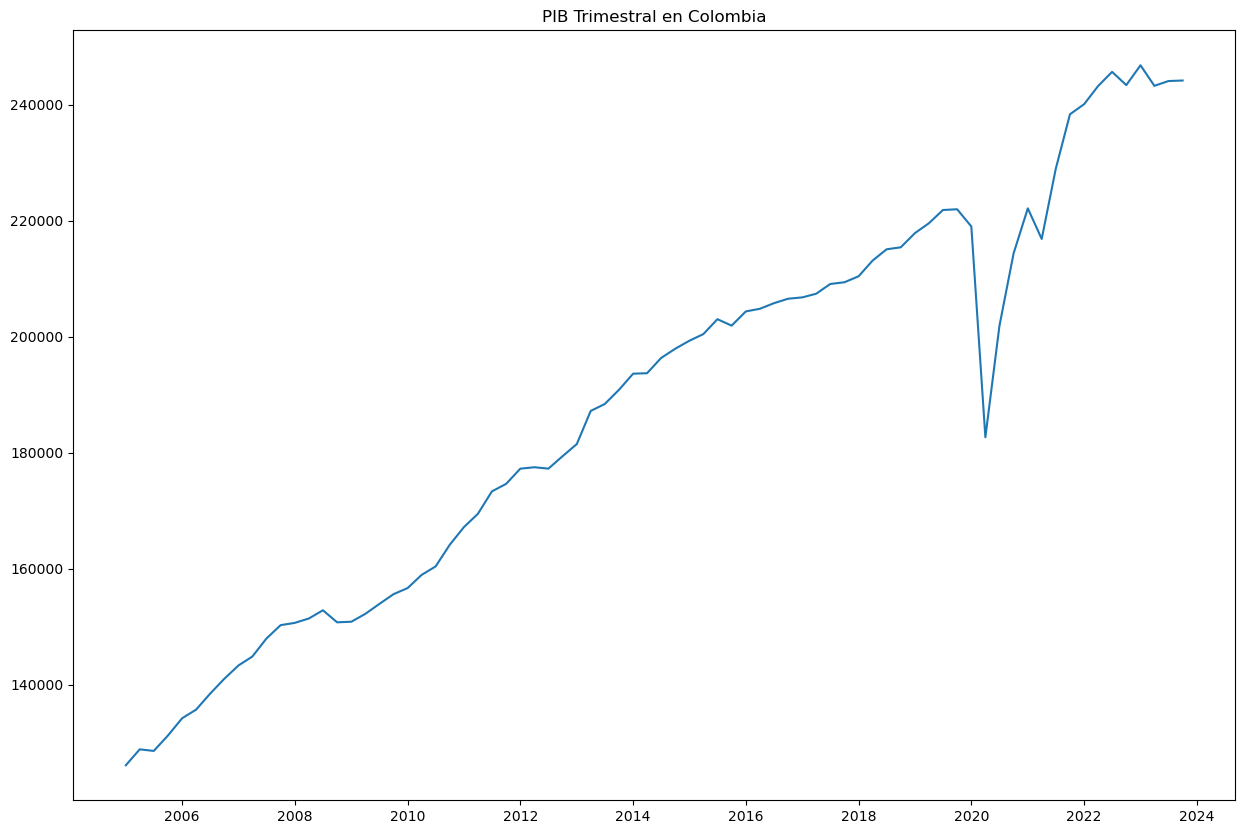

In [5]:
#Primera observación de los datos
DatosPIB['Anio-Trimestre']=pd.to_datetime(DatosPIB['Anio-Trimestre']) #Convirtiendo la columna año y mes a formato fecha. Además
# mantiene que los datos se vean agrupados en el gráfico
DatosPIB1=DatosPIB.set_index('Anio-Trimestre')
print(type(DatosPIB1))
#Convirtiendo el data frame en objeto serie de tiempo
PIBTS=DatosPIB1['PIB']
print(type(PIBTS))
plt.plot(PIBTS)#Haciendo un primer gráfico de la serie de tiempo
plt.title('PIB Trimestral en Colombia')

### Gráfico Interactivo

In [6]:
#Haciendo un gráfico interactivo ahora
# Crea un gráfico de líneas
fig = px.line(PIBTS, y="PIB",title="PIB Trimestral en Colombia",template='plotly_dark')#Se le puede quitar el modo oscuro si quiere
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

La conclusión inicial con este primer gráfico es que se observa la tendencia creciente del PIB, se presentó una caída súbita a partir del año 2020, ya es sabido lo que ocurrió en ese periodo. Una vez llegado el tercer trimestre de 2021, el PIB consiguió seguir la tendencia creciente que se tenía desde antes de la pandemia.

## Autocorrelación
A continuación, se presenta un primer gráfico de la autocorrelación, recordemos que éste no es válido, hasta que retiremos la tendencia y la estacionalidad.

(0.0, 20.0)

array([ 1.        ,  0.94735806,  0.89760863,  0.84994712,  0.80268661,
        0.75256935,  0.70312296,  0.65787898,  0.61610396,  0.57643435,
        0.54300864,  0.51569452,  0.48741749,  0.46087244,  0.44065332,
        0.43147852,  0.39689914,  0.35863993,  0.32046241,  0.2824021 ,
        0.24608616,  0.21046586,  0.1755033 ,  0.14102191,  0.11010463,
        0.0799392 ,  0.05059978,  0.02400697, -0.00271136, -0.02769308,
       -0.05361865, -0.08116396, -0.10969929, -0.13670044, -0.16114231,
       -0.1847665 , -0.20627189, -0.22622459, -0.24544251, -0.26158456,
       -0.27811308])

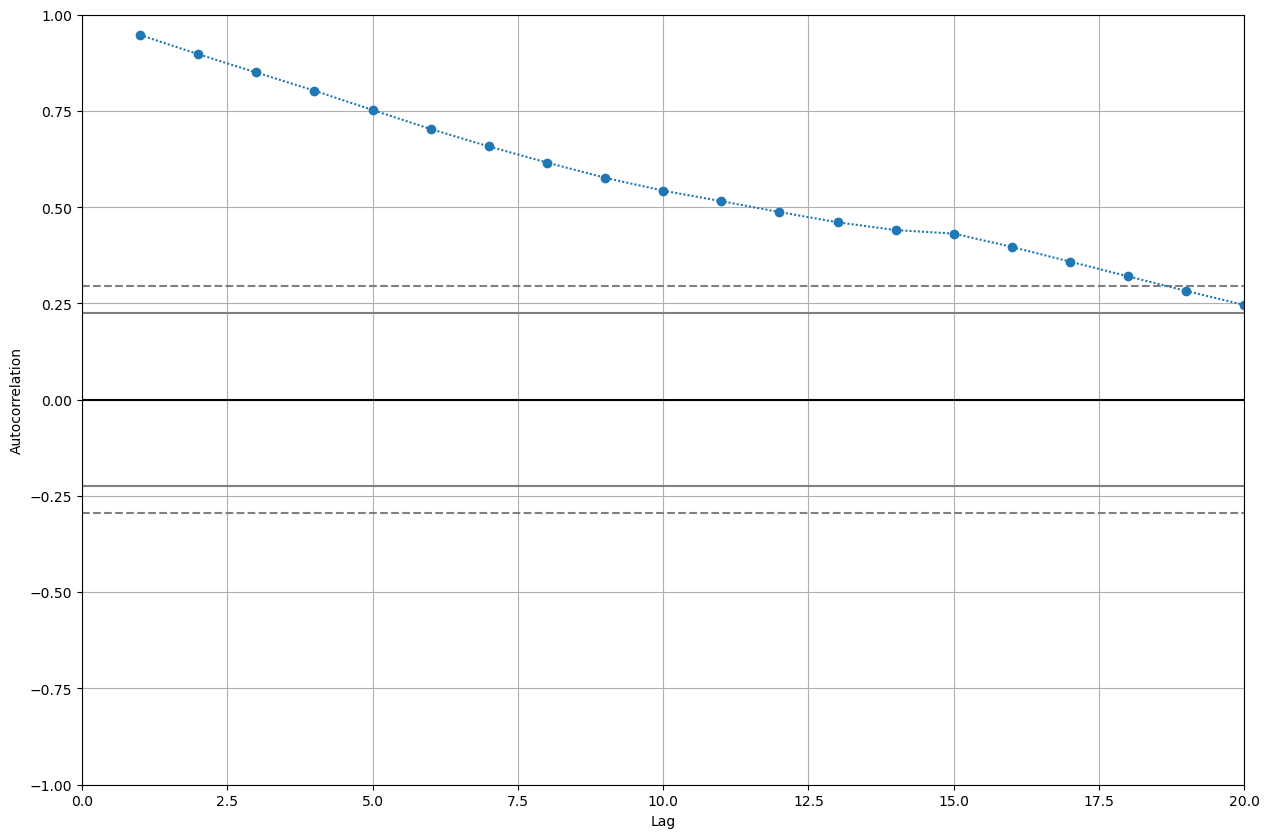

In [7]:
from pandas.plotting import autocorrelation_plot
ax =autocorrelation_plot(PIBTS,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])
acf(PIBTS,adjusted=False,fft=False,nlags=40)###fft=FALSE es para quitar el warning

# Análisis Descriptivo
Como ya mencionamos anteriormente, el primer componente que se puede identificar en la serie de tiempo es la tendencia creciente del PIB, aparenta haber un ciclo en el que se tienen años con PIB con tendencia a aumentar, luego, se tienen otros años en los que su tendencia disminuye. Se puede observar esto desde 2001 hasta alrededor del segundo trimestre de 2008, luego desciende, hasta empezar a crecer de nuevo, para empezar a decrecer en 2012 y crecer nuevamente en 2013.
## Estabilización de la varianza
Primero se recurre a realizar la estabilización de la varianza de la serie, a través de la **Transformación Box-Cox**.
### Transformación Box-Cox

In [8]:
BoxCoxStat=sp.stats.boxcox(PIBTS,alpha=0.05)
BoxCoxStat[1]#Estimación de Lambda
BoxCoxStat[2]#Intervalo de Confianza para Lambda
type(PIBTS)

0.9905515532242177

(-0.3027164638128056, 2.3025000000666456)

pandas.core.series.Series

El $\lambda$ resultante es cercano a 1, por lo que no será necesario realizar una transformación sobre los datos

## Extracción de la tendencia

### Estimación mediante un modelo lineal
A continucación, se realiza un modelo de regresión lineal simple utilizando como variable regresora el tiempo, y como variable de estudio, el PIB trimestral.

In [9]:
X1 = np.arange(2005, 2024, 1/4)#Creando un array que va desde enero de 2005 hasta diciembre de 2023
X=X1

LinearRegression()

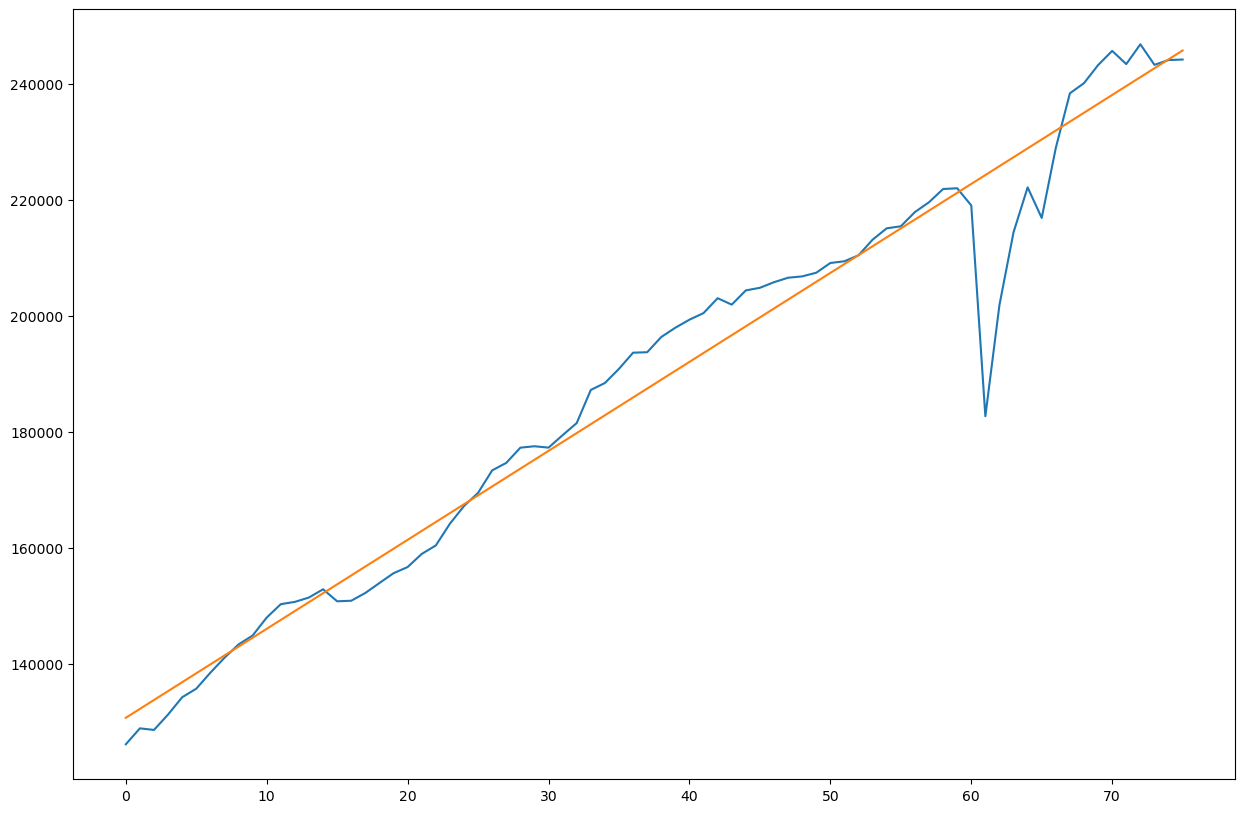

array([6134.65644386])

-12169293.886904912

In [10]:
from sklearn.linear_model import LinearRegression
X = np.reshape(X, (len(X), 1))#convirtiendo X en una matriz de longitud de X por 1
y = PIBTS.values #Extrayendo solo las observaciones de la serie del PIB
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.show()
model.coef_
model.intercept_

Haciendo una revisión meramente visual, el modelo lineal resultante logra capturar el comportamiento creciente del PIB trimestral, ignorando el suceso ocurrido en 2020 claramente. La serie resultante de extraer esta tendencia lineal es la siguiente.

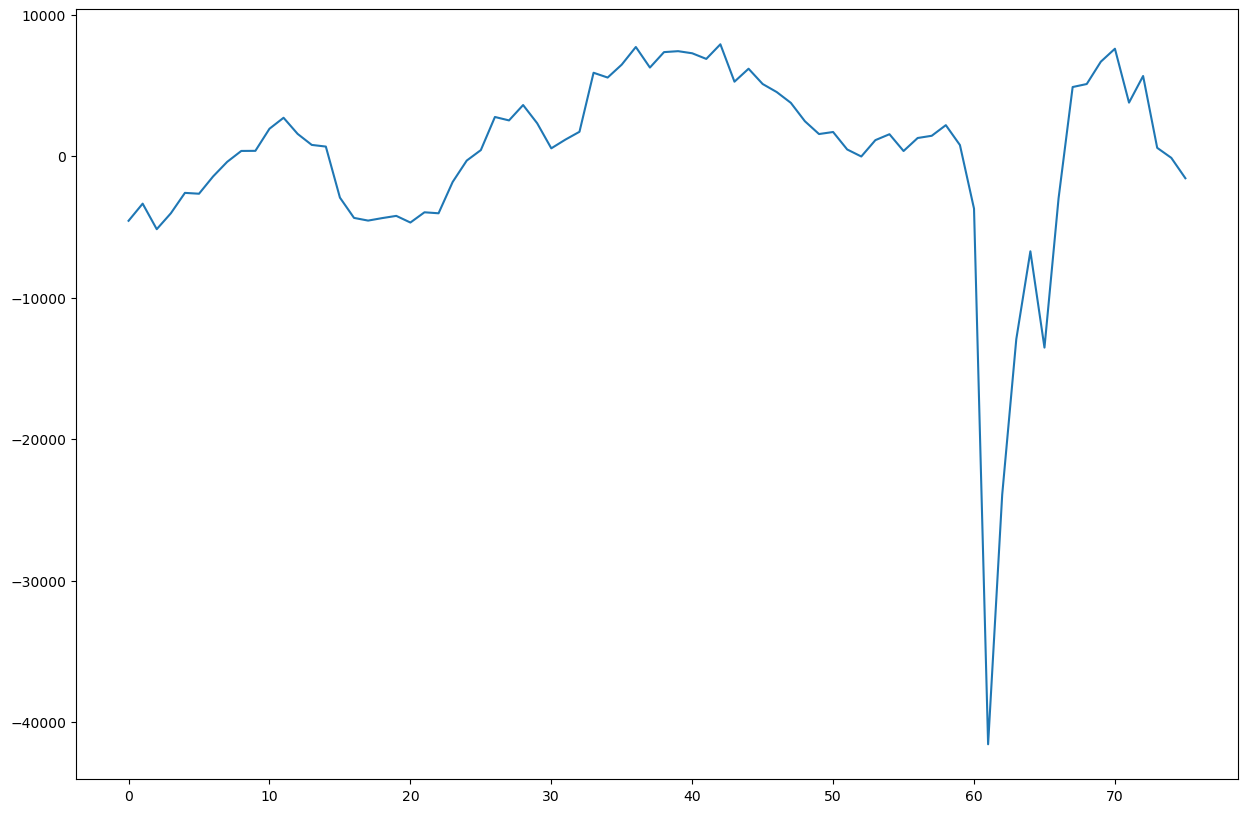

In [11]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(PIBTS))]
# plot detrended
plt.plot(detrended)
plt.show()
PIB_detrend=pd.Series(detrended,index=PIBTS.index)

Al realizar la extracción respectiva, la serie resultante no es adecuada para continuar con el análisis, puesto que el valle resultante de la extracción en años de pandemia perjudica los próximos procedimientos. Lo cual provocaría que al realizar predicciones bajo el modelo lineal, éstas sean subajustadas.

In [12]:
X = sm.add_constant(X)
linmodel = sm.OLS(y, X)
results = linmodel.fit()
print(results.summary())
ypred = results.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1659.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.00e-52
Time:                        15:11:06   Log-Likelihood:                -781.86
No. Observations:                  76   AIC:                             1568.
Df Residuals:                      74   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+07   3.03e+05    -40.110      0.0

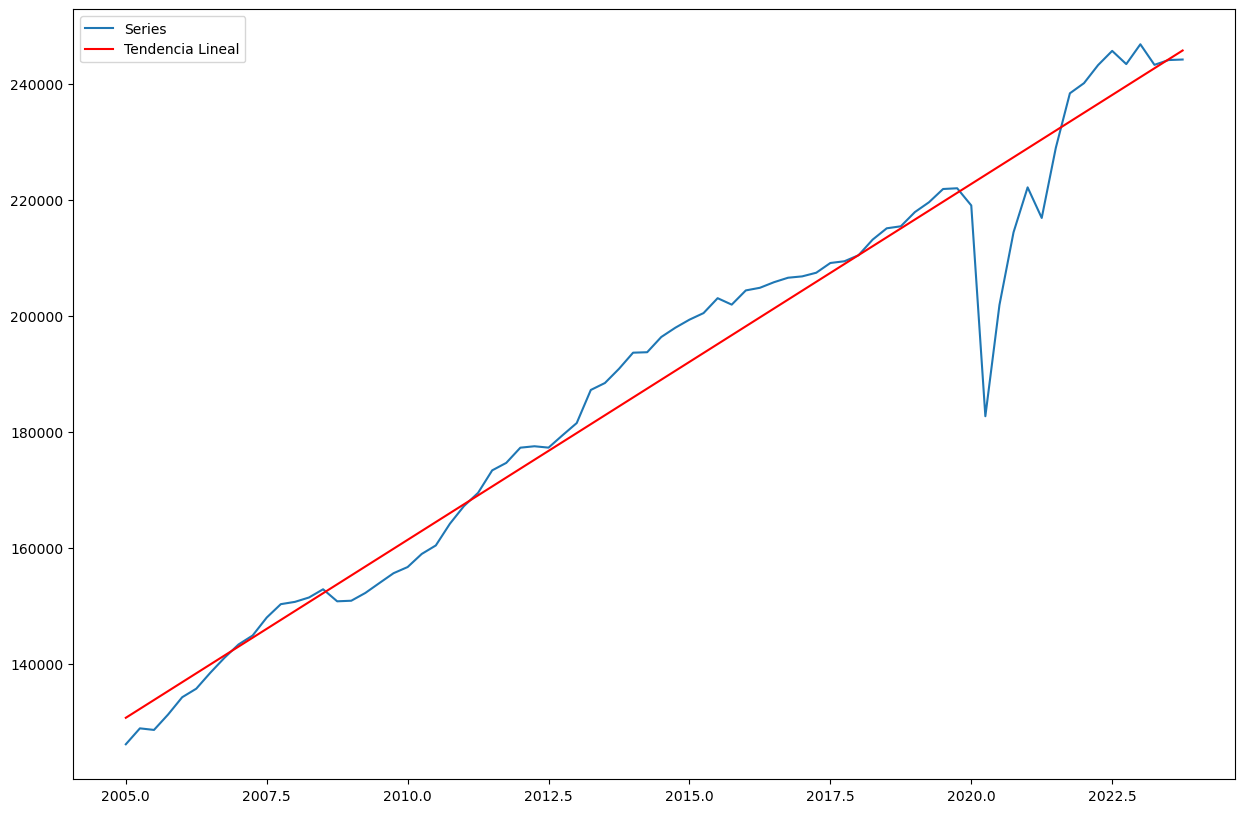

In [13]:
fig, ax = plt.subplots()
ax.plot(X1, y, '-', label="Series")
ax.plot(X1, ypred, 'r', label="Tendencia Lineal")
ax.legend(loc="best");

### Extracción de la tendencia utilizando promedio móvil

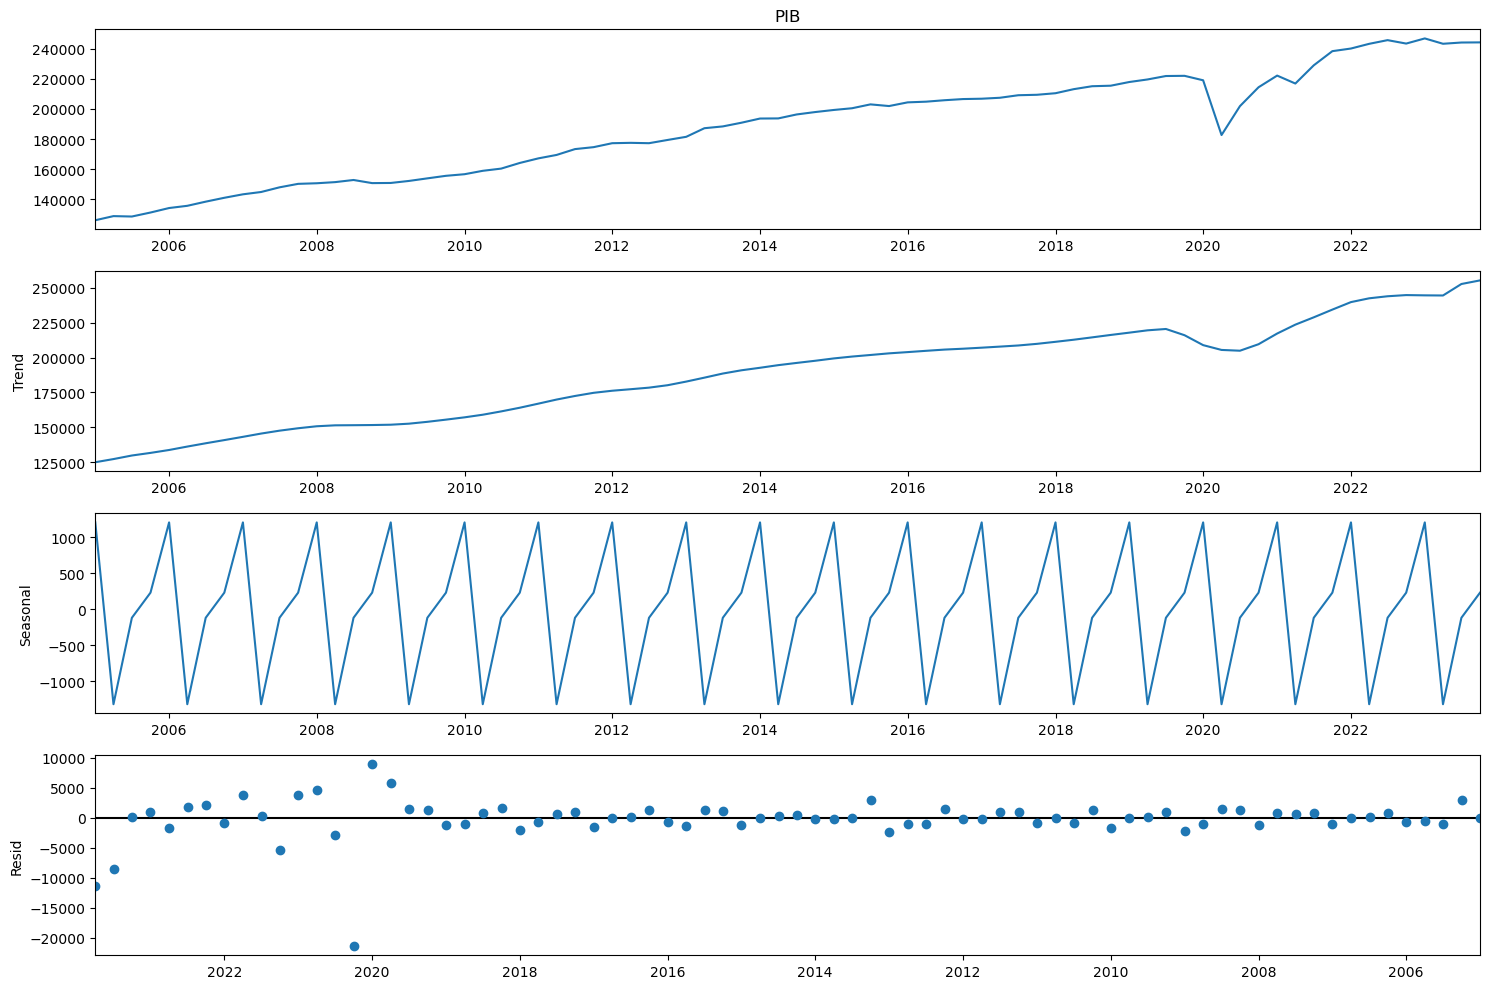

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

###También se puede hacer vía STL###
Descomp = seasonal_decompose(PIBTS, model='additive',extrapolate_trend=6)

descomposicion_PIB=Descomp.plot()
descomposicion_PIB.gca().invert_xaxis()
pyplot.show()

### Gráficos de autocorrelación
A partir de este momento los gráficos correspondientes a la autocorrelación pueden realizarse, de mostrar algún patrón cíclico será indicio de la presencia de estacionalidad

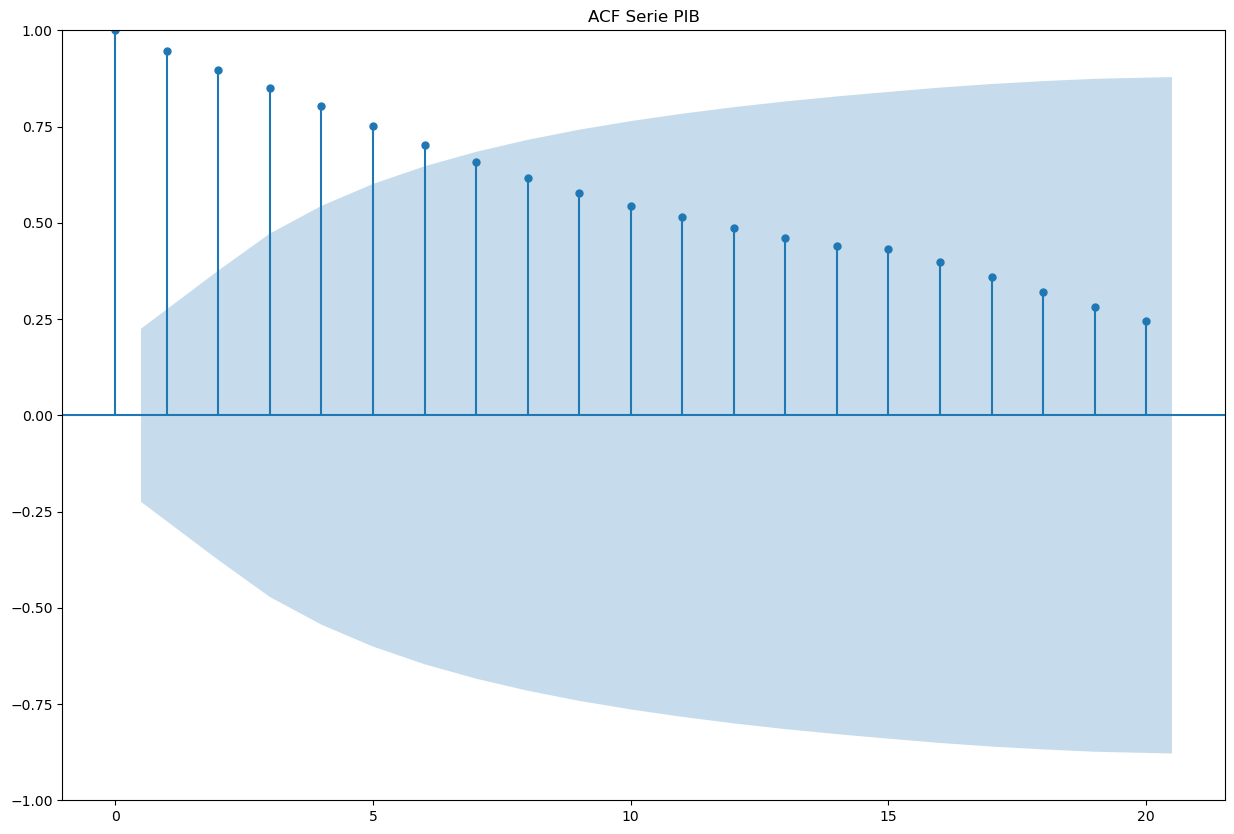

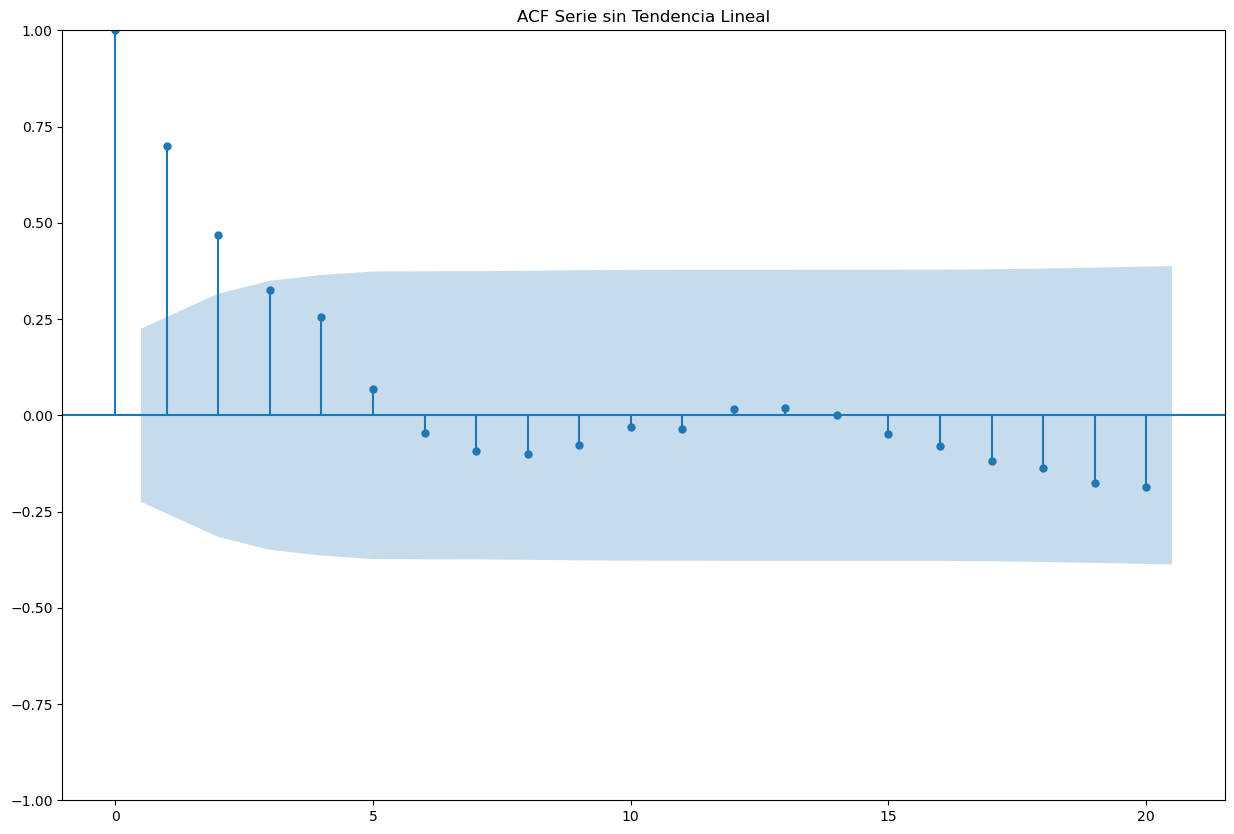

In [15]:
a=plot_acf(PIBTS,adjusted=False,lags=20,title='ACF Serie PIB')
b=plot_acf(PIB_detrend,adjusted=False,lags=20,title='ACF Serie sin Tendencia Lineal')

# Modelamiento utilizando árboles 
Recordemos que utilizaremos la serie original, debido a que la serie no tiene estacionalidad, de acuerdo a los ACF.

In [105]:
PIBTS
PIBTS_DF = pd.DataFrame(PIBTS.values,index=pd.date_range(start='2005-01-01', end='2023-12-01', freq='QS'))
#PIBTS_DF = PIBTS_DF.iloc[1:]#Me deshago de la primera fila que no tiene observación
PIBTS_DF

Anio-Trimestre
2005-01-01    126125.790850
2005-04-01    128871.539452
2005-07-01    128599.726108
2005-10-01    131255.943474
2006-01-01    134234.013588
                  ...      
2022-10-01    243369.962678
2023-01-01    246785.261057
2023-04-01    243240.731918
2023-07-01    244066.682319
2023-10-01    244157.551456
Name: PIB, Length: 76, dtype: float64

0
2005-01-01  126125.790850
2005-04-01  128871.539452
2005-07-01  128599.726108
2005-10-01  131255.943474
2006-01-01  134234.013588
...                   ...
2022-10-01  243369.962678
2023-01-01  246785.261057
2023-04-01  243240.731918
2023-07-01  244066.682319
2023-10-01  244157.551456

[76 rows x 1 columns]

In [106]:
from pandas import DataFrame
df1 = DataFrame()#Creando un DataFrame vacío para luego llenar

for i in range(4,0,-1):
    df1[['t-'+str(i)]] = PIBTS_DF.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo, y al hacer

#for i in range(12,8,-1):
    #df1[['t-'+str(i)]] = PIBTS_DF.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo, y al hacer
    
#for i in range(6,1,-1):   
    #df1[['t-'+str(i)]] = PIBTS_DF.shift(i)

df1

t-4            t-3            t-2            t-1
2005-01-01            NaN            NaN            NaN            NaN
2005-04-01            NaN            NaN            NaN  126125.790850
2005-07-01            NaN            NaN  126125.790850  128871.539452
2005-10-01            NaN  126125.790850  128871.539452  128599.726108
2006-01-01  126125.790850  128871.539452  128599.726108  131255.943474
...                   ...            ...            ...            ...
2022-10-01  238338.291557  240084.043267  243197.794253  245646.199802
2023-01-01  240084.043267  243197.794253  245646.199802  243369.962678
2023-04-01  243197.794253  245646.199802  243369.962678  246785.261057
2023-07-01  245646.199802  243369.962678  246785.261057  243240.731918
2023-10-01  243369.962678  246785.261057  243240.731918  244066.682319

[76 rows x 4 columns]

In [107]:
df1['t'] = PIBTS_DF.values
print(df1.head(13))

                      t-4            t-3            t-2            t-1  \
2005-01-01            NaN            NaN            NaN            NaN   
2005-04-01            NaN            NaN            NaN  126125.790850   
2005-07-01            NaN            NaN  126125.790850  128871.539452   
2005-10-01            NaN  126125.790850  128871.539452  128599.726108   
2006-01-01  126125.790850  128871.539452  128599.726108  131255.943474   
2006-04-01  128871.539452  128599.726108  131255.943474  134234.013588   
2006-07-01  128599.726108  131255.943474  134234.013588  135707.557915   
2006-10-01  131255.943474  134234.013588  135707.557915  138463.566525   
2007-01-01  134234.013588  135707.557915  138463.566525  141029.861972   
2007-04-01  135707.557915  138463.566525  141029.861972  143333.193576   
2007-07-01  138463.566525  141029.861972  143333.193576  144873.706349   
2007-10-01  141029.861972  143333.193576  144873.706349  147970.382545   
2008-01-01  143333.193576  144873.7063

In [110]:
df1_qpro = df1[4:]
print(df1_qpro)
df1_qpro.size

                      t-4            t-3            t-2            t-1  \
2006-01-01  126125.790850  128871.539452  128599.726108  131255.943474   
2006-04-01  128871.539452  128599.726108  131255.943474  134234.013588   
2006-07-01  128599.726108  131255.943474  134234.013588  135707.557915   
2006-10-01  131255.943474  134234.013588  135707.557915  138463.566525   
2007-01-01  134234.013588  135707.557915  138463.566525  141029.861972   
...                   ...            ...            ...            ...   
2022-10-01  238338.291557  240084.043267  243197.794253  245646.199802   
2023-01-01  240084.043267  243197.794253  245646.199802  243369.962678   
2023-04-01  243197.794253  245646.199802  243369.962678  246785.261057   
2023-07-01  245646.199802  243369.962678  246785.261057  243240.731918   
2023-10-01  243369.962678  246785.261057  243240.731918  244066.682319   

                        t  
2006-01-01  134234.013588  
2006-04-01  135707.557915  
2006-07-01  138463.566525  

360

## División de los datos

In [111]:
PIBsplit = df1_qpro.values #Convirtiendo en NumpyArray
X1= PIBsplit[:, 0:-1]#Selecciono todas las filas, y todas las columnas excepto la última que es la variable respuesta
y1 =PIBsplit[:,-1] #Selecciono todas las filas y solo la última columna

In [112]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.2, train_size=0.8,shuffle=False)

In [113]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.12, train_size=0.88,shuffle=False)

## Creación del árbol
Recordemos que en este caso no se está especificando la profundidad del árbol, por lo que adoptará la profundidad máxima, es decir, sobreajuste.

In [114]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_PIB = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_PIB.fit(X_train, y_train)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PIB.score(X_train, y_train))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_PIB.score(X_val,y_val))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_PIB.predict(X_val)-y_val)**2).mean()) )

DecisionTreeRegressor()

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -4.695681087075739
el RECM sobre validación es: 37495392.43564065


Explorando diferentes profundidades

In [115]:
for d in [2,3,4,5,6,7,8,9,10,11,12]:
    # Create the tree and fit it
    decision_tree_PIB = DecisionTreeRegressor(max_depth=d)
    decision_tree_PIB.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PIB.score(X_train, y_train))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_PIB.score(X_val,y_val), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_PIB.predict(X_val),y_val, squared=False))

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.942069546588365
Coeficiente R2 sobre el conjunto de validación: -29.275201920387854 

el RECM sobre el conjunto de validación es: 14117.560050734528


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9883423048231792
Coeficiente R2 sobre el conjunto de validación: -18.06084834997471 

el RECM sobre el conjunto de validación es: 11201.784993851641


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9973981655465809
Coeficiente R2 sobre el conjunto de validación: -10.141321558268181 

el RECM sobre el conjunto de validación es: 8564.154115868274


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.99941643264918
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9998226932629244
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9999015738022563
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9999855531143983
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



DecisionTreeRegressor(max_depth=12)

max_depth= 12
Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: -4.695681087075739 

el RECM sobre el conjunto de validación es: 6123.348139346696


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



La profundidad adecuada para este caso es 5, ya que es la que produce el menor RECM

## Modelo completo(Juntando entrenamiento y validación)

DecisionTreeRegressor(max_depth=5)

<Figure size 800x600 with 0 Axes>

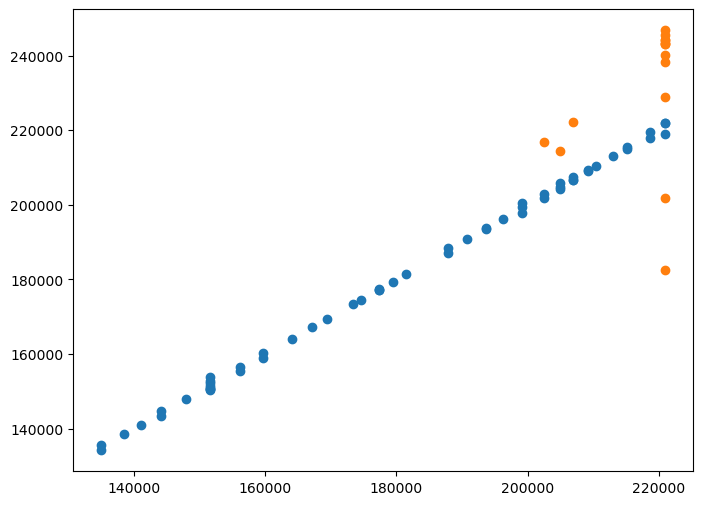

Raíz de la Pérdida cuadrática Entrenamiento: 703.670778762728
Raíz de la Pérdida cuadrática Prueba: 21506.45053981667


C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\ander\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [116]:
# Gráfico de los valores predichos vs los verdaderos(entrenamiento y validación)

from matplotlib import pyplot as plt

# Usando la profundidad 5

decision_tree_PIB = DecisionTreeRegressor(max_depth=5)  #Creando el árbol con la profundidad anteriormente seleccionada - 5
decision_tree_PIB.fit(X_train_full, y_train_full) #Entrenando el árbol

# Predicción de entrenamiento y test
train_val_prediction = decision_tree_PIB.predict(X_train_full)
test_prediction = decision_tree_PIB.predict(X_test)

# Gráfico de las predicciones vs los verdaderos(lo ideal sería una recta y=x)
plt.figure(figsize=(8, 6))
plt.scatter(train_val_prediction, y_train_full, label='train')  # Azul, indican la predicción vs el verdadero valor, pero del entrenamiento
plt.scatter(test_prediction, y_test, label='test')  # Naranja, , indican la predicción vs el verdadero valor, pero del test
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, y_train_full,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, y_test,squared=False))

72
72
72


observado     Predicción
2006-01-01  134234.013588  134970.785751
2006-04-01  135707.557915  134970.785751
2006-07-01  138463.566525  138463.566525
2006-10-01  141029.861972  141029.861972
2007-01-01  143333.193576  144103.449963
2007-04-01  144873.706349  144103.449963
2007-07-01  147970.382545  147970.382545
2007-10-01  150279.717530  151624.518059
2008-01-01  150671.656974  151624.518059
2008-04-01  151427.832789  151624.518059

<Figure size 1000x600 with 0 Axes>

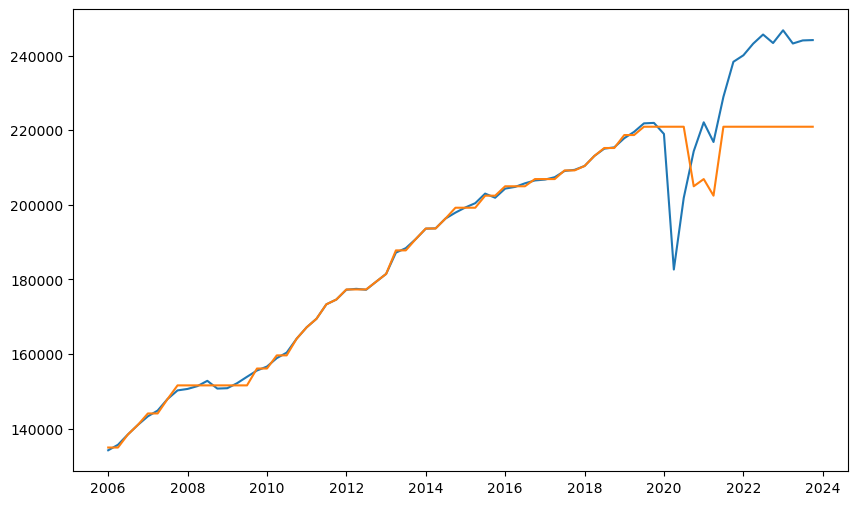

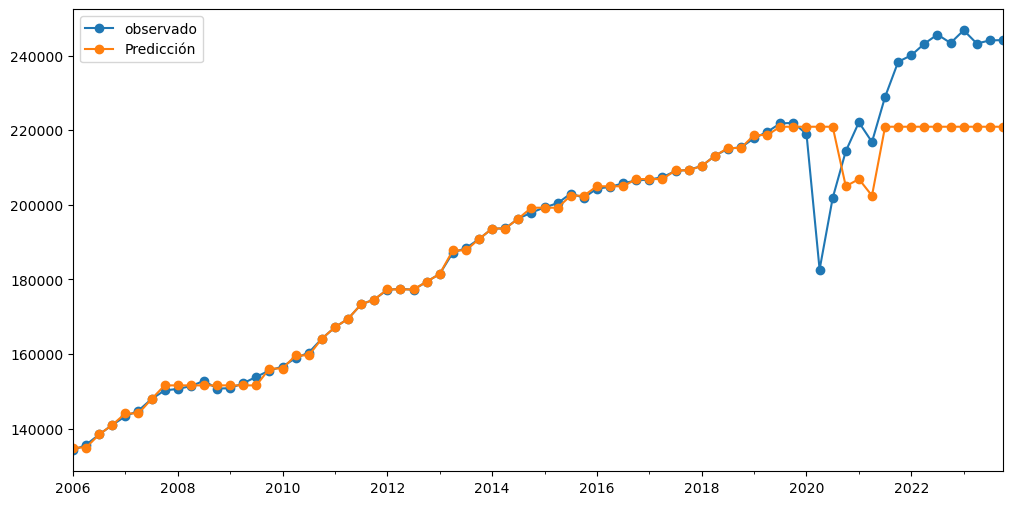

In [117]:
indicetrian_val_test=df1_qpro.index #Seleccionando los índices
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:51]#Seleccionando los índices del entrenamiento y validación
indicetest=indicetrian_val_test[51:75]#Seleccionando los índices del test

targetjoint=np.concatenate((y_train_full,y_test))#Uniendo los verdaderos valores entrenamiento-validación con el test
predictionjoint=np.concatenate((train_val_prediction,test_prediction))#Uniendo las presicciones de entrenamiento-validación con test
print(targetjoint.size)
print(predictionjoint.size)
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)#Recordemos que eliminamos las 12 primeras observaciones porque habían NA cuando organizamos los datos
#Gráfico simple de lo observado y lo predicho
plt.figure(figsize=(10, 6))
plt.plot(ObsvsPred)
ax = ObsvsPred.plot( marker="o", figsize=(12,6))
ax.axvline(x=indicetrian_val_test[51].date(),color='red')

In [118]:
InverArbol = pd.Series(pd.Series(np.concatenate([PIBTS[1::][:63].values,test_prediction]), index=pd.date_range('2005-01-01', periods=78, freq='Q',normalize=True)))#En este caso no hay que hacer nada, simplemente poner los datos originales y las 12 predicciones
fig = px.line(PIBTS, y="PIB", title="PIB en Colombia", template='plotly_dark')  # Se le puede quitar el modo oscuro si quiere
fig.add_trace(go.Scatter(x=InverArbol.index, y=InverArbol, mode='lines', name='Predicciones(árboles)'))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Modelamiento utilizando Redes Neuronales
## Redes Neuronales Multicapa(MLP)

### Estandarización de las covariables

In [119]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

### Red Neuronal con una sola capa
Recordemos que los hiperparámetros de una red neuronal multicapa son la cantidad de capas, los nodos que tiene cada capa y la función de activación.
Para crear las capas se utiliza [], y se separan con comas. En este caso, hay una sola capa oculta, y una de salida (*keras.layers.Dense(1)*)
* *layers.Dense* - layers indica que voy a añadir una nueva capa, .Dense, que esa capa será Densa
* 64 son la cantidad de nodos que hay dentro de esa primera capa oculta.
* activation="relu" indica que la función de activación es relu
* *input_shape=X_train.shape[1:]* son la cantidad de columnas que tiene nuestro dataframe, en este caso 9(escogimos 9 retardos)
* La capa de salida *keras.layers.Dense(1)* tiene un 1 debido a que nuestra variable respuesta es univariada

In [122]:
ModMLP1=keras.models.Sequential([keras.layers.Dense(64,activation="linear",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
ModMLP1.summary()

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

Utilizaremos el error cuadrático medio como métrica y el optimizador adam.
Además, realizaremos 50 épocas, con un tamaño de lote de 10 (por defecto el tamaño de lote es 32), entonces tendré 51/10 lotes, 51 porque hay 51 datos de entrenamiento

In [128]:
ModMLP1.compile(loss="mean_squared_error",optimizer="adam")
historyMod1=ModMLP1.fit(X_train,y_train,batch_size=1,epochs=50,validation_data=(X_val,y_val)) 

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 32239675392.0000 - val_loss: 47727030272.0000
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30968289280.0000 - val_loss: 47716016128.0000
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29912320000.0000 - val_loss: 47703805952.0000
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30797113344.0000 - val_loss: 47690674176.0000
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30337294336.0000 - val_loss: 47676428288.0000
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32015237120.0000 - val_loss: 47661625344.0000
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30642397184.0000 - val_loss: 47645380608.0000
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32689825792.0000 - val_loss: 47627657216.0000
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31444860928.0000 - val_loss: 47609778176.0000
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30528

#### Comportamiento de la pérdida cuadrática en este conjunto de entrenamiento y validación

(50, 4)

<Axes: >

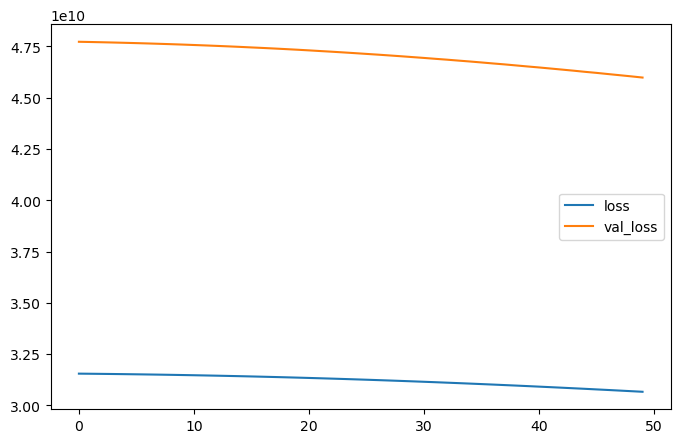

In [129]:
X_train.shape
pd.DataFrame(historyMod1.history).plot(figsize=(8,5))

In [130]:
mse_test1=ModMLP1.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 51268218880.0000


In [131]:
ypred1=ModMLP1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


#### Gráfico de predicción y valores reales

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'PIB')

Text(0.5, 0, 'índice')

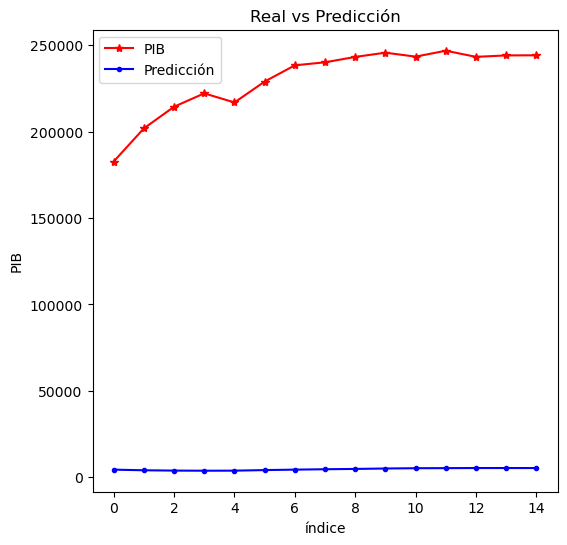

In [132]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred1.size), ypred1, linestyle='-', marker='.', color='b') 
plt.legend(['PIB','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('PIB')
plt.xlabel('índice')

### Red neuronal con más capas
La anterior red neuronal contó con una sola capa oculta, la siguiente red contará con tres capas ocultas, de 64, 32, y 16 nodos respectivamente.
Utilizaremos la función de activación relu como la anterior, así como un tamaño de lote igual a 12 y 50 épocas.

In [133]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(32,activation="relu")(hidden1)
hidden3 = keras.layers.Dense(16,activation="relu")(hidden2)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [134]:
ModMLP2=keras.Model(inputs=[input_layer],outputs=[output_layer])
ModMLP2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (50, 4)
Target shape: (50,)


In [137]:
ModMLP2.compile(loss="mean_squared_error",optimizer="adam")
historyMod2=ModMLP2.fit(X_train,y_train,epochs=50,batch_size=1,validation_data=(X_val,y_val))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 30851702784.0000 - val_loss: 46791012352.0000
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29730887680.0000 - val_loss: 46380937216.0000
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30866976768.0000 - val_loss: 45792907264.0000
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31656177664.0000 - val_loss: 44985561088.0000
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29318395904.0000 - val_loss: 43876294656.0000
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30093451264.0000 - val_loss: 42356084736.0000
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28027695104.0000 - val_loss: 40399081472.0000
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27433498624.0000 - val_loss: 37862510592.0000
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26202857472.0000 - val_loss: 34653671424.0000
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24011

<Axes: >

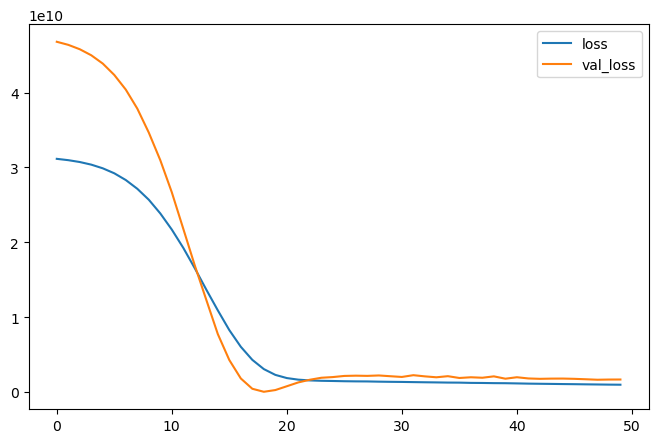

In [138]:
pd.DataFrame(historyMod2.history).plot(figsize=(8,5))

In [139]:
mse_test2=ModMLP2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 3318011648.0000


In [140]:
100*(1-mse_test2/mse_test1)

93.52813161743293

In [141]:
ypred2=ModMLP2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'PIB')

Text(0.5, 0, 'índice')

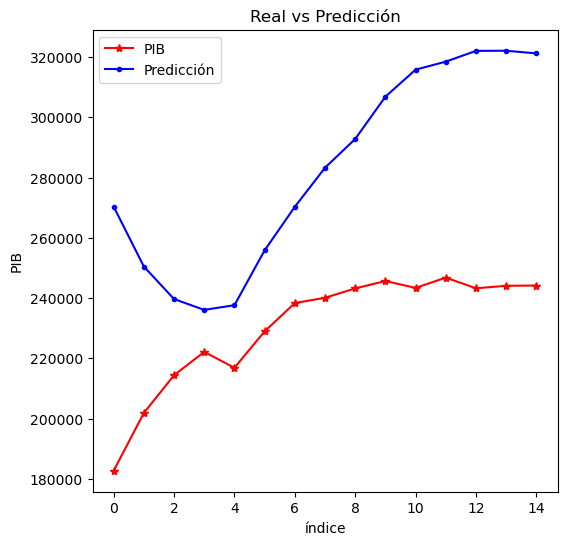

In [142]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred2.size), ypred2, linestyle='-', marker='.', color='b') 
plt.legend(['PIB','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('PIB')
plt.xlabel('índice')

### Búsqueda de los hiperparámetros

In [144]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

<Sequential name=sequential_65, built=False>

In [145]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [146]:
tuner_GridSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.003, 'sampling': 'linear'}


In [149]:
stop_early=keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [151]:
tuner_GridSearch_mlp.search(X_train,y_train, epochs=20,batch_size=1, validation_data=(X_val,y_val),callbacks=[stop_early])

Trial 240 Complete [00h 00m 09s]
val_loss: 47575437312.0

Best val_loss So Far: 4062997.75
Total elapsed time: 00h 40m 28s


In [152]:
# Get the top 2 models.
models_mlp = tuner_GridSearch_mlp.get_best_models(num_models=2)
best_model_mlp = models_mlp[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
# best_model_mlp.build(input_shape=(32, 1, 7))
# best_model_mlp.summary()

C:\Users\ander\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



#### Los mejores 10 modelos

In [155]:
tuner_GridSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0023 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 32
dropout: False
lr: 0.010000000000000002
units_1: 64
Score: 4062997.75

Trial 0031 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 32
dropout: True
lr: 0.010000000000000002
units_1: 64
Score: 9056832.0

Trial 0174 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 2
units_0: 64
dropout: True
lr: 0.010000000000000002
units_1: 32
Score: 13974057.0

Trial 0168 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 2
units_0: 64
dropout: True
lr: 0.001
units_1: 32
Score: 22667586.0

Trial 0135 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 64
dropout: False
lr: 0.010000000000000002
units_1: 64
Score: 23100590.0

Trial 0123 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
un

### Modelo final
Finalmente se entrenará el mejor modelo con los datos de entrenamiento y validación.

In [157]:
callback=keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(X_train_full,y_train_full, epochs=50,batch_size=1,callbacks=[callback])

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7587324928.0000 - mean_squared_error: 7587324928.0000 
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21595394.0000 - mean_squared_error: 21595394.0000
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9770380.0000 - mean_squared_error: 9770380.0000
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11991011.0000 - mean_squared_error: 11991011.0000
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12468600.0000 - mean_squared_error: 12468600.0000
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16610910.0000 - mean_squared_error: 16610910.0000
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18445304.0000 - mean_squared_error: 18445304.0000  
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30057208.0000 - mean_squared_error: 30057208.0000


In [158]:
model_mlp.layers[0].get_weights()[0]

array([[ 0.15394646,  0.13200973,  0.28242314,  0.11808353, -0.25376195,
        -0.07732737,  0.23850514,  0.24819665, -0.10090557,  0.11669379,
        -0.03807968,  0.27143654,  0.0950768 ,  0.1056447 ,  0.24441159,
         0.262088  , -0.1006012 ,  0.12284733, -0.23693137, -0.05215251,
        -0.20604932, -0.30648115, -0.3890584 ,  0.18178213, -0.40200493,
        -0.23570621, -0.11709434,  0.3234871 , -0.08144289,  0.09606463,
         0.20913185,  0.16976972],
       [-0.3279799 , -0.17368418,  0.33767146, -0.2976309 , -0.18471585,
        -0.13204561,  0.3681677 ,  0.12323753,  0.16271293, -0.3025803 ,
        -0.16206224,  0.08566858, -0.264794  ,  0.07276803,  0.00071055,
         0.01618116, -0.29718798,  0.06375603,  0.12924942, -0.31184152,
        -0.39206538, -0.04306921, -0.2856186 , -0.32282227, -0.03043205,
        -0.00511131, -0.12006283,  0.24195686,  0.236986  , -0.21897401,
         0.3193267 , -0.22772016],
       [-0.12578207,  0.27930185, -0.05930973, -0.1282

In [159]:
print(model_mlp.layers[0].bias.numpy())

[ 0.          0.04566621  0.00714506 -0.07035389  0.         -0.08303969
  0.03448972 -0.07545257  0.         -0.06005462  0.          0.08760915
  0.         -0.11404568  0.12066027  0.05394862  0.         -0.06035961
  0.00841947  0.          0.          0.          0.          0.
  0.          0.          0.         -0.07713656  0.03290559  0.
  0.04132796  0.0284742 ]


In [160]:
X_test.shape

(15, 4)

In [161]:
prediction_test=model_mlp.predict( X_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [162]:
y_test=y_test.reshape((y_test.shape[0], 1))

In [164]:
errors_squared=keras.metrics.MeanSquaredError()
errors_squared.update_state(y_test, prediction_test)
print("RECM:",errors_squared.result().numpy()**0.5)

#errors_squared=keras.metrics.mean_squared_error(y_test, prediction_test).numpy()
#print("RECM:",errors_squared.mean()**0.5)

RECM: 231118.55949706852


Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

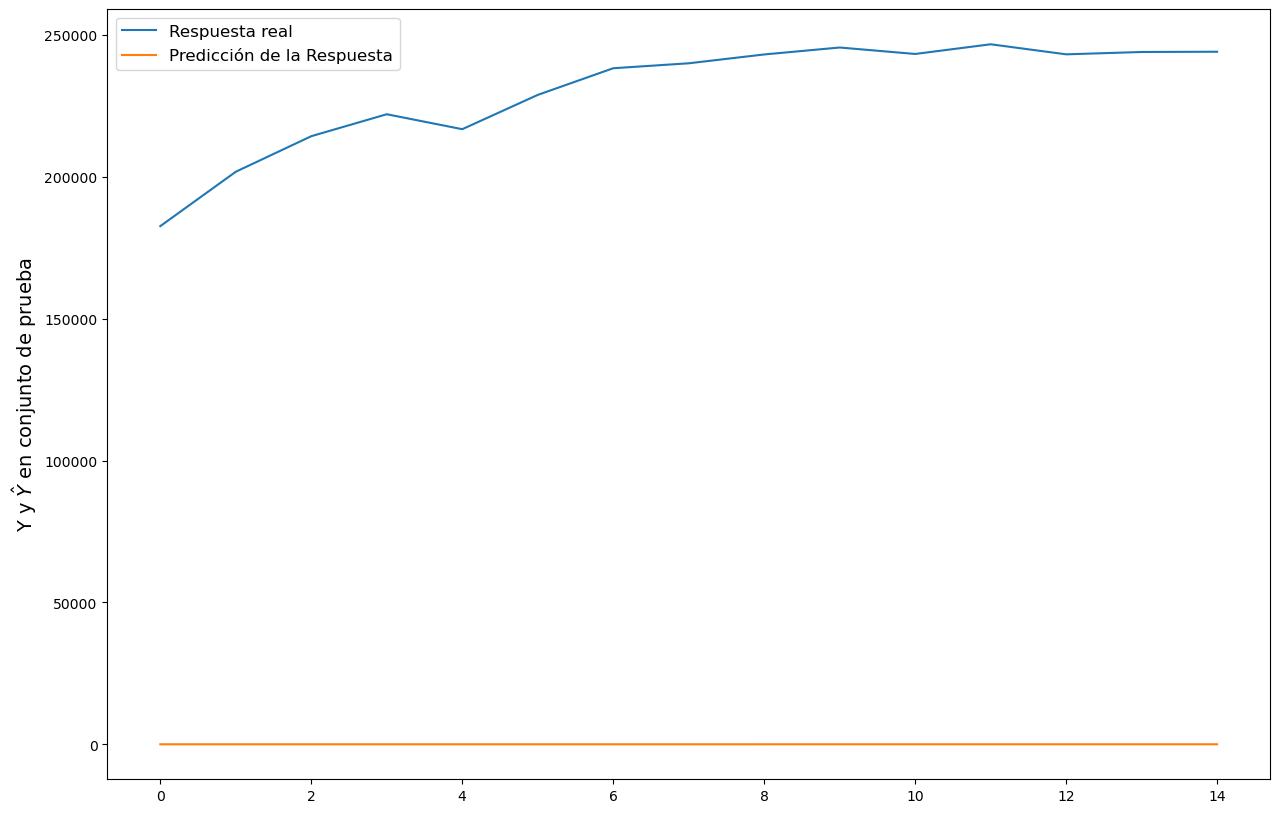

In [165]:
plt.plot(y_test)
plt.plot(prediction_test)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

Text(0, 0.5, '$\\hat{e}$ en conjunto de prueba')

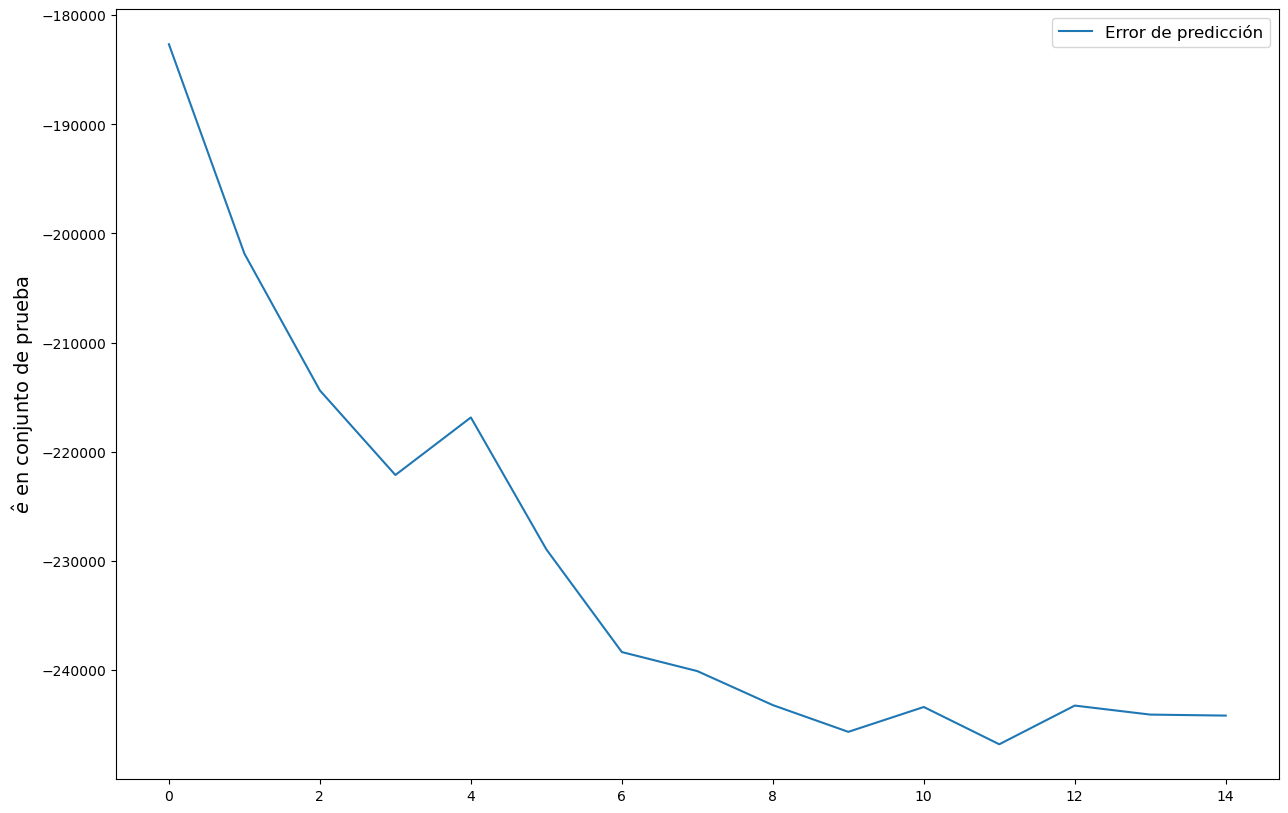

In [166]:
#Gráfico de errores
plt.plot(prediction_test-y_test)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=14)

## Redes neuronales recurrentes (RNN)
Implementaremos tres redes recurrentes, una simple, una GRU y una LSTM.

In [167]:
X_train_full.shape

(57, 4)

In [168]:
#Modifiqué en el argumento input_shape x_train.shape[0] porque mis datos están configurados de forma diferente, pero es lo mismo, al del profe
def SimpleRNN_(n_units = 10, l1_reg=0, seed=1729):
  model = keras.models.Sequential()
  model.add(keras.layers.SimpleRNN(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[0], x_train.shape[-1]), unroll=True, stateful=False))  
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def GRU_(n_units = 10, l1_reg=0, seed=1729):
  model = keras.models.Sequential()
  model.add(keras.layers.GRU(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[0], x_train.shape[-1]), unroll=True))  
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def LSTM_(n_units = 10, l1_reg=0, seed=1729):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[0], x_train.shape[-1]), unroll=True)) 
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [170]:
max_epochs = 100 #Definimos 100 épocas
batch_size = 1# Mantenemos el tamaño del batch

In [171]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, min_delta=1e-7, restore_best_weights=True)

In [172]:
params = {
    'rnn': {
        'model': None, 'function': SimpleRNN_, 'l1_reg': 0.0, 'H': 20, 
        'color': 'blue', 'label':'RNN'}, 
    'gru': {
        'model': None, 'function':GRU_,'l1_reg': 0.0, 'H': 10, 
        'color': 'orange', 'label': 'GRU'},
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 10, 
        'color':'red', 'label': 'LSTM'}
}

#### Validación cruzada
A comparación del anterior modelamiento, usaremos validación cruzada ahora

In [173]:
do_training = True # Set to True if you wish to train your own models

In [174]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [175]:
X_train_full

array([[126125.79085004, 128871.53945218, 128599.72610794,
        131255.9434737 ],
       [128871.53945218, 128599.72610794, 131255.9434737 ,
        134234.01358794],
       [128599.72610794, 131255.9434737 , 134234.01358794,
        135707.55791453],
       [131255.9434737 , 134234.01358794, 135707.55791453,
        138463.56652533],
       [134234.01358794, 135707.55791453, 138463.56652533,
        141029.86197221],
       [135707.55791453, 138463.56652533, 141029.86197221,
        143333.19357595],
       [138463.56652533, 141029.86197221, 143333.19357595,
        144873.70634907],
       [141029.86197221, 143333.19357595, 144873.70634907,
        147970.38254533],
       [143333.19357595, 144873.70634907, 147970.38254533,
        150279.71752966],
       [144873.70634907, 147970.38254533, 150279.71752966,
        150671.65697417],
       [147970.38254533, 150279.71752966, 150671.65697417,
        151427.8327893 ],
       [150279.71752966, 150671.65697417, 151427.8327893 ,
      

In [176]:
cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    n_units = [5, 10, 20]
    l1_reg = [0, 0.001, 0.01, 0.1]
    
    # A dictionary containing a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}
    
    # In the kth split, TimeSeriesSplit returns first k folds 
    # as training set and the (k+1)th fold as test set.
    tscv = TimeSeriesSplit(n_splits = 5)
    
    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        model = KerasRegressor(model=params[key]['function'], epochs=max_epochs, 
                               batch_size=batch_size, verbose=2, l1_reg=0, n_units=10)
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(X_train_full, y_train_full, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))
            
        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Performing cross-validation. Model: rnn
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.0s
[CV] END ...............................l1_reg=0, n_units=20; total time=   0.0s
[CV] END

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ander\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ander\anaconda3\lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\ander\anaconda3\lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\ander\anaconda3\lib\site-packages\scikeras\wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\ander\anaconda3\lib\site-packages\scikeras\wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\ander\AppData\Local\Temp\ipykernel_16852\736034519.py", line 4, in SimpleRNN_
    model.add(keras.layers.SimpleRNN(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[0], x_train.shape[-1]), unroll=True, stateful=False))
NameError: name 'x_train' is not defined


In [71]:
print(X_train.shape)  # Output: (n,)

# Obtener el tipo de datos (dtype) de los elementos de y_train
print(X_train.dtype)  # Output: dtype('int64') (o el tipo de datos correspondiente)

# Obtener el número total de elementos en y_train
print(X_train.size)  # Output: n (donde n es el número total de elementos en y_train)

# Obtener el número de dimensiones de y_train
print(X_train.ndim)  # Output: 1 (si y_train es un vector)

(44, 9)
float64
396
2
